# Home Sample 1% (second notebook)

# Bag of words & Ngrams

In [222]:
#reading the file "Home Sample 1%" 
#opened from file name: "Home and Kitchen RAW - 100% to 1%"

import pandas as pd 
data = pd.read_csv('home_sample0.01.csv')
print(data)

       overall  verified        asin  \
0            5      True  B00MFY9CDU   
1            2      True  B00H0RTQ7Y   
2            5      True  B017Q2848E   
3            4      True  B0010DCIGU   
4            3      True  B004CYELQ4   
...        ...       ...         ...   
68947        5     False  B017J9RMEG   
68948        5      True  B00APU2XAK   
68949        5      True  B01BHFZ7F4   
68950        5      True  B0078P9D5S   
68951        5      True  B004C04BYU   

                                              reviewText  \
0      VERY VERY GOOD FOR ME AS I NEED A QUICK ICE CR...   
1      I love the fan but you can't get replacement f...   
2      Absolutely beautiful pillow covers.  They made...   
3       Used for mimosas at a baby shower. Worked great.   
4      Eh it does the job. I think that if I had made...   
...                                                  ...   
68947  These silicone oven mitts are wonderful!\nThey...   
68948  This is absolutely an EXCELLENT 

In [223]:
#checking the main dataframe
    
df = pd.DataFrame.from_dict(data)
df

,overall,verified,asin,reviewText,summary
0,5,True,B00MFY9CDU,VERY VERY GOOD FOR ME AS I NEED A QUICK ICE CR...,I LIKE THE RESULTS AND I NEED GOOD RESULTS.
1,2,True,B00H0RTQ7Y,I love the fan but you can't get replacement f...,No filter replacements available anymore
2,5,True,B017Q2848E,Absolutely beautiful pillow covers. They made...,Five Stars
3,4,True,B0010DCIGU,Used for mimosas at a baby shower. Worked great.,Worked great.
4,3,True,B004CYELQ4,Eh it does the job. I think that if I had made...,Be a better baker
...,...,...,...,...,...
68947,5,False,B017J9RMEG,These silicone oven mitts are wonderful!\nThey...,The only oven mitts you will need!
68948,5,True,B00APU2XAK,This is absolutely an EXCELLENT product!!! Ver...,PERFECT!!!
68949,5,True,B01BHFZ7F4,These were a big hit at my friends bachelorett...,They are good quality and lasted through the w...
68950,5,True,B0078P9D5S,was very impressed with this omelet pan was we...,nonstick pan


In [224]:
#percentage per score

df["overall"].value_counts(normalize=True) 

5    0.677442
4    0.151946
3    0.074472
1    0.055125
2    0.041014
Name: overall, dtype: float64

In [225]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [226]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('tagsets')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/juliamarques/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/juliamarques/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/juliamarques/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package tagsets to
[nltk_data]     /Users/juliamarques/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


True

In [227]:
from sklearn.model_selection import train_test_split

In [228]:
df

,overall,verified,asin,reviewText,summary
0,5,True,B00MFY9CDU,VERY VERY GOOD FOR ME AS I NEED A QUICK ICE CR...,I LIKE THE RESULTS AND I NEED GOOD RESULTS.
1,2,True,B00H0RTQ7Y,I love the fan but you can't get replacement f...,No filter replacements available anymore
2,5,True,B017Q2848E,Absolutely beautiful pillow covers. They made...,Five Stars
3,4,True,B0010DCIGU,Used for mimosas at a baby shower. Worked great.,Worked great.
4,3,True,B004CYELQ4,Eh it does the job. I think that if I had made...,Be a better baker
...,...,...,...,...,...
68947,5,False,B017J9RMEG,These silicone oven mitts are wonderful!\nThey...,The only oven mitts you will need!
68948,5,True,B00APU2XAK,This is absolutely an EXCELLENT product!!! Ver...,PERFECT!!!
68949,5,True,B01BHFZ7F4,These were a big hit at my friends bachelorett...,They are good quality and lasted through the w...
68950,5,True,B0078P9D5S,was very impressed with this omelet pan was we...,nonstick pan


In [229]:
#number of rows, number of columns

df.shape

(68952, 5)

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68952 entries, 0 to 68951
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   overall     68952 non-null  int64 
 1   verified    68952 non-null  bool  
 2   asin        68952 non-null  object
 3   reviewText  68952 non-null  object
 4   summary     68952 non-null  object
dtypes: bool(1), int64(1), object(3)
memory usage: 2.2+ MB


In [231]:
#filtering reviews

df['verified'].unique()

array([ True, False])

In [232]:
#verified reviews

verif_df = df[df['verified'] == True]

In [366]:
verif_df 

,overall,verified,asin,reviewText,summary,length,polarity,subjectivity
0,5,True,B00MFY9CDU,VERY VERY GOOD FOR ME AS I NEED A QUICK ICE CR...,I LIKE THE RESULTS AND I NEED GOOD RESULTS.,56,0.508667,0.756000
1,2,True,B00H0RTQ7Y,I love the fan but you can't get replacement f...,No filter replacements available anymore,31,-0.041667,0.541667
4,3,True,B004CYELQ4,Eh it does the job. I think that if I had made...,Be a better baker,39,0.088889,0.644444
5,5,True,B007B796KU,Came well packaged. Very easy to put together....,Very nice piece.,30,0.548333,0.787500
11,3,True,B014DAVCP4,The thermometer is a little wonky. It will giv...,Sometimes the readings are all over,49,-0.063041,0.510065
...,...,...,...,...,...,...,...,...
68943,1,True,B00008ELEA,I loved the pot but failed to work after 5 mon...,Didn't last,25,0.100000,0.433333
68945,5,True,B01G7SUW0G,"Very very nice set. It's well made, not at all...",Beautiful set,57,0.640000,0.800000
68946,5,True,B002MEVMH2,I really like the table. It was shipped on tim...,Cosco Premium Square Folding TTable,29,0.450000,0.400000
68948,5,True,B00APU2XAK,This is absolutely an EXCELLENT product!!! Ver...,PERFECT!!!,74,0.451250,0.724167


In [234]:
#Now I'll drop the verified column, as I know they are all verified
#Now I have 62979 rows

In [235]:
verif_df.shape #nothing changed, so they were all verified

(62979, 5)

In [236]:
#percentage per score

verif_df ["overall"].value_counts(normalize=True) 

5    0.684562
4    0.149256
3    0.074819
1    0.051795
2    0.039569
Name: overall, dtype: float64

In [237]:
#count of reviews per score

verif_df ["overall"].value_counts() 

5    43113
4     9400
3     4712
1     3262
2     2492
Name: overall, dtype: int64

In [238]:
verif_df["reviewText"].iloc[0] #Here is where NLP begins #now I need to analyse the sentences

'VERY VERY GOOD FOR ME AS I NEED A QUICK ICE CRUSHER TO IMPRESS MY WIFE WITH RESULTS WHEN I MAKE A FOOD FOR HER THAT IS EXOTIC AND NEEDS THIS TYPE AURA. THIS FINISHES OUT THE PRESENTATION. IT IS HEAVY AND IT WORKS LIKE A DOG. FATFUL TO DATE AND IMPRESSIVE.\nWITH RESPECT\nLOWELL GARNER'

In [239]:
verif_df['length'] = list(map(lambda x: len(str(x).split()), verif_df['reviewText'])) #length = number of words

/var/folders/y0/yj8c7cqs19v6_dxrxj76yrbh0000gn/T/ipykernel_4285/124959987.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verif_df['length'] = list(map(lambda x: len(str(x).split()), verif_df['reviewText'])) #length = number of words


In [240]:
verif_df

,overall,verified,asin,reviewText,summary,length
0,5,True,B00MFY9CDU,VERY VERY GOOD FOR ME AS I NEED A QUICK ICE CR...,I LIKE THE RESULTS AND I NEED GOOD RESULTS.,56
1,2,True,B00H0RTQ7Y,I love the fan but you can't get replacement f...,No filter replacements available anymore,31
2,5,True,B017Q2848E,Absolutely beautiful pillow covers. They made...,Five Stars,13
3,4,True,B0010DCIGU,Used for mimosas at a baby shower. Worked great.,Worked great.,9
4,3,True,B004CYELQ4,Eh it does the job. I think that if I had made...,Be a better baker,39
...,...,...,...,...,...,...
68946,5,True,B002MEVMH2,I really like the table. It was shipped on tim...,Cosco Premium Square Folding TTable,29
68948,5,True,B00APU2XAK,This is absolutely an EXCELLENT product!!! Ver...,PERFECT!!!,74
68949,5,True,B01BHFZ7F4,These were a big hit at my friends bachelorett...,They are good quality and lasted through the w...,51
68950,5,True,B0078P9D5S,was very impressed with this omelet pan was we...,nonstick pan,21


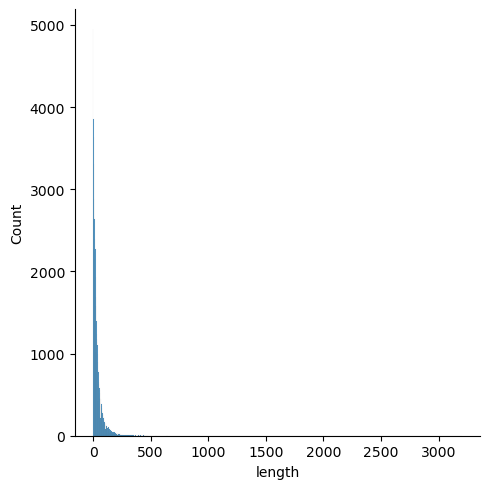

In [241]:
sns.displot(x=verif_df['length'])

In [242]:
verif_df['length'].describe()

count    62979.000000
mean        38.035663
std         56.601745
min          1.000000
25%          8.000000
50%         22.000000
75%         46.000000
max       3200.000000
Name: length, dtype: float64

In [243]:
m = verif_df['length'].median()
m

22.0

In [244]:
mo = verif_df['length'].mode()
mo

0    2
Name: length, dtype: int64

In [245]:
#Now I only have the reviews with more than 22 words (30.755 reviews)

verif_df = verif_df[verif_df['length'] > m] 
verif_df.shape

(30755, 6)

In [246]:
verif_df.head()

,overall,verified,asin,reviewText,summary,length
0,5,True,B00MFY9CDU,VERY VERY GOOD FOR ME AS I NEED A QUICK ICE CR...,I LIKE THE RESULTS AND I NEED GOOD RESULTS.,56
1,2,True,B00H0RTQ7Y,I love the fan but you can't get replacement f...,No filter replacements available anymore,31
4,3,True,B004CYELQ4,Eh it does the job. I think that if I had made...,Be a better baker,39
5,5,True,B007B796KU,Came well packaged. Very easy to put together....,Very nice piece.,30
11,3,True,B014DAVCP4,The thermometer is a little wonky. It will giv...,Sometimes the readings are all over,49


In [247]:
#Now my dataframe has 30755 rows

verif_df

,overall,verified,asin,reviewText,summary,length
0,5,True,B00MFY9CDU,VERY VERY GOOD FOR ME AS I NEED A QUICK ICE CR...,I LIKE THE RESULTS AND I NEED GOOD RESULTS.,56
1,2,True,B00H0RTQ7Y,I love the fan but you can't get replacement f...,No filter replacements available anymore,31
4,3,True,B004CYELQ4,Eh it does the job. I think that if I had made...,Be a better baker,39
5,5,True,B007B796KU,Came well packaged. Very easy to put together....,Very nice piece.,30
11,3,True,B014DAVCP4,The thermometer is a little wonky. It will giv...,Sometimes the readings are all over,49
...,...,...,...,...,...,...
68943,1,True,B00008ELEA,I loved the pot but failed to work after 5 mon...,Didn't last,25
68945,5,True,B01G7SUW0G,"Very very nice set. It's well made, not at all...",Beautiful set,57
68946,5,True,B002MEVMH2,I really like the table. It was shipped on tim...,Cosco Premium Square Folding TTable,29
68948,5,True,B00APU2XAK,This is absolutely an EXCELLENT product!!! Ver...,PERFECT!!!,74


In [248]:
#corpus = a collection of sentences (not reviews)

reviews = ['']
corpus=[]                            
for review in verif_df['reviewText']:
    reviews.append(review)
    corpus.append(nltk.sent_tokenize(review))

In [249]:
corpus

[['VERY VERY GOOD FOR ME AS I NEED A QUICK ICE CRUSHER TO IMPRESS MY WIFE WITH RESULTS WHEN I MAKE A FOOD FOR HER THAT IS EXOTIC AND NEEDS THIS TYPE AURA.',
  'THIS FINISHES OUT THE PRESENTATION.',
  'IT IS HEAVY AND IT WORKS LIKE A DOG.',
  'FATFUL TO DATE AND IMPRESSIVE.',
  'WITH RESPECT\nLOWELL GARNER'],
 ["I love the fan but you can't get replacement filters anymore so it makes this super expensive fan useless.",
  "I've been waiting for 5 months for them to refill their stock."],
 ['Eh it does the job.',
  'I think that if I had made yummy donuts then it would be worthy of a 5 star review.',
  'But because of my incompetency to bake well, I will down it to a 3.'],
 ['Came well packaged.',
  'Very easy to put together.',
  'I like that you can adjust feet to keep your items safe in the shelves.',
  'Color is true to picture.',
  'Very nice.'],
 ['The thermometer is a little wonky.',
  'It will give weird readings and then be right on.',
  "I like the remote temp feature, but the o

In [250]:
## flatten the list

corpus=[sent for sublist in corpus for sent in sublist]

In [251]:
#number of sentences: 151.556

len(corpus) 

151556

In [252]:
for i in range(len(corpus)):
    corpus[i] = corpus[i].lower()
    corpus[i] = re.sub(r'\W+',' ',corpus[i]) # Replace everything non-alpahnumeric by ' '
    corpus[i] = re.sub(r'\s+',' ',corpus[i]) # Replace one or more whitespaces by  ' '
    corpus[i] = re.sub(r'\d+',' ',corpus[i]) # Replace one or more digits by  ' '
    corpus[i] = re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)'," ", corpus[i]) # Replace e-mails by ' '
    # Replace urls by ''
    corpus[i] = re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', ' ' , corpus[i]) 
    # Replace html tags by ''
    corpus[i] = BeautifulSoup(corpus[i], 'html.parser').get_text().strip()

In [253]:
print(len(corpus))

151556


In [254]:
print(corpus[16])

it will give weird readings and then be right on


In [255]:
#tokenizing the corpus   #Token = word

wordfreq = {}              
for sentence in corpus:
    words = sentence.split()
    #tokens = nltk.word_tokenize(sentence) # To get the words, it can be also done with sentence.split()
    for word in words:
        if ( word not in wordfreq.keys() ): ## first time appearnce in the sentence
            wordfreq[word] = 1 # We initialize the corresponding counter
        else: ## if the world is already existed in the dictionalry 
            wordfreq[word] += 1 # We increase the corresponding counter

In [256]:
#for the entire dataset... now I need to drop the stop words
wordfreq

{'very': 10968,
 'good': 6063,
 'for': 30109,
 'me': 4183,
 'as': 12056,
 'i': 76583,
 'need': 2267,
 'a': 54687,
 'quick': 480,
 'ice': 815,
 'crusher': 15,
 'to': 53579,
 'impress': 11,
 'my': 21308,
 'wife': 469,
 'with': 16536,
 'results': 212,
 'when': 6620,
 'make': 3043,
 'food': 1255,
 'her': 1006,
 'that': 20047,
 'is': 32347,
 'exotic': 6,
 'and': 60794,
 'needs': 644,
 'this': 29774,
 'type': 531,
 'aura': 4,
 'finishes': 19,
 'out': 7086,
 'the': 102924,
 'presentation': 23,
 'it': 65328,
 'heavy': 1442,
 'works': 3371,
 'like': 8406,
 'dog': 322,
 'fatful': 1,
 'date': 107,
 'impressive': 48,
 'respect': 16,
 'lowell': 1,
 'garner': 1,
 'love': 5914,
 'fan': 845,
 'but': 17700,
 'you': 14891,
 'can': 7520,
 't': 14687,
 'get': 4952,
 'replacement': 662,
 'filters': 360,
 'anymore': 191,
 'so': 14544,
 'makes': 1834,
 'super': 1012,
 'expensive': 790,
 'useless': 188,
 've': 3069,
 'been': 2555,
 'waiting': 132,
 'months': 1261,
 'them': 8377,
 'refill': 125,
 'their': 1350

In [257]:
#Reducing th corpus now

#There are two approaches for this: 1. drop "stopwords" (articles, prepositions,...etc) 2. use TF-IDF

In [258]:
from nltk.corpus import stopwords
stop_words = list(stopwords.words('english')) 

In [259]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [260]:
for i in range(len(stop_words)):
    stop_words[i] = re.sub(r"\s*'\s*\w*","",stop_words[i])

#stop_words = [word for word in list(np.unique(stop_words)) if len(word) > 1]
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'you',
 'you',
 'you',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'she',
 'her',
 'hers',
 'herself',
 'it',
 'it',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'that',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more'

In [261]:
#Now let's drop the stop words and get how many times appear every non stopword in the whole dataset.

In [262]:
corpus = [(wordfreq[key],key) for key in list(wordfreq.keys()) if key not in stop_words]

In [263]:
corpus

[(6063, 'good'),
 (2267, 'need'),
 (480, 'quick'),
 (815, 'ice'),
 (15, 'crusher'),
 (11, 'impress'),
 (469, 'wife'),
 (212, 'results'),
 (3043, 'make'),
 (1255, 'food'),
 (6, 'exotic'),
 (644, 'needs'),
 (531, 'type'),
 (4, 'aura'),
 (19, 'finishes'),
 (23, 'presentation'),
 (1442, 'heavy'),
 (3371, 'works'),
 (8406, 'like'),
 (322, 'dog'),
 (1, 'fatful'),
 (107, 'date'),
 (48, 'impressive'),
 (16, 'respect'),
 (1, 'lowell'),
 (1, 'garner'),
 (5914, 'love'),
 (845, 'fan'),
 (4952, 'get'),
 (662, 'replacement'),
 (360, 'filters'),
 (191, 'anymore'),
 (1834, 'makes'),
 (1012, 'super'),
 (790, 'expensive'),
 (188, 'useless'),
 (132, 'waiting'),
 (1261, 'months'),
 (125, 'refill'),
 (105, 'stock'),
 (13, 'eh'),
 (1191, 'job'),
 (1815, 'think'),
 (3649, 'made'),
 (29, 'yummy'),
 (28, 'donuts'),
 (7122, 'would'),
 (18, 'worthy'),
 (628, 'star'),
 (787, 'review'),
 (1, 'incompetency'),
 (180, 'bake'),
 (6944, 'well'),
 (1531, 'came'),
 (308, 'packaged'),
 (5043, 'easy'),
 (3558, 'put'),
 (13

In [265]:
corpus.sort(reverse = True)

# Here we keep only the 1000 most frequent words but it can be changed to another bigger value

corpus_freq = [(word[1],word[0]) for word in corpus[:1000]] 
corpus_freq = corpus_freq[1:]
corpus_freq

[('great', 9162),
 ('use', 8680),
 ('like', 8406),
 ('would', 7122),
 ('well', 6944),
 ('good', 6063),
 ('love', 5914),
 ('easy', 5043),
 ('get', 4952),
 ('time', 4854),
 ('really', 4689),
 ('bought', 4598),
 ('nice', 4521),
 ('little', 4387),
 ('much', 4247),
 ('product', 4063),
 ('used', 3944),
 ('also', 3678),
 ('made', 3649),
 ('quality', 3563),
 ('put', 3558),
 ('price', 3455),
 ('perfect', 3417),
 ('works', 3371),
 ('even', 3147),
 ('size', 3143),
 ('small', 3088),
 ('water', 3063),
 ('make', 3043),
 ('set', 2952),
 ('two', 2914),
 ('work', 2879),
 ('buy', 2876),
 ('still', 2770),
 ('back', 2619),
 ('using', 2612),
 ('looks', 2606),
 ('clean', 2596),
 ('better', 2596),
 ('first', 2594),
 ('got', 2564),
 ('coffee', 2557),
 ('top', 2452),
 ('look', 2399),
 ('recommend', 2381),
 ('fit', 2371),
 ('way', 2364),
 ('enough', 2339),
 ('need', 2267),
 ('room', 2236),
 ('keep', 2235),
 ('could', 2193),
 ('plastic', 2134),
 ('bit', 2110),
 ('long', 2076),
 ('looking', 2062),
 ('right', 1984

In [266]:
#Steming

from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')
lem = WordNetLemmatizer()

corpus_freq = [(lem.lemmatize(word[0]),word[1]) for word in corpus_freq]
corpus_freq

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/juliamarques/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


[('great', 9162),
 ('use', 8680),
 ('like', 8406),
 ('would', 7122),
 ('well', 6944),
 ('good', 6063),
 ('love', 5914),
 ('easy', 5043),
 ('get', 4952),
 ('time', 4854),
 ('really', 4689),
 ('bought', 4598),
 ('nice', 4521),
 ('little', 4387),
 ('much', 4247),
 ('product', 4063),
 ('used', 3944),
 ('also', 3678),
 ('made', 3649),
 ('quality', 3563),
 ('put', 3558),
 ('price', 3455),
 ('perfect', 3417),
 ('work', 3371),
 ('even', 3147),
 ('size', 3143),
 ('small', 3088),
 ('water', 3063),
 ('make', 3043),
 ('set', 2952),
 ('two', 2914),
 ('work', 2879),
 ('buy', 2876),
 ('still', 2770),
 ('back', 2619),
 ('using', 2612),
 ('look', 2606),
 ('clean', 2596),
 ('better', 2596),
 ('first', 2594),
 ('got', 2564),
 ('coffee', 2557),
 ('top', 2452),
 ('look', 2399),
 ('recommend', 2381),
 ('fit', 2371),
 ('way', 2364),
 ('enough', 2339),
 ('need', 2267),
 ('room', 2236),
 ('keep', 2235),
 ('could', 2193),
 ('plastic', 2134),
 ('bit', 2110),
 ('long', 2076),
 ('looking', 2062),
 ('right', 1984),

In [267]:
cols = {word[0]: [] for word in corpus_freq}
reviews = pd.DataFrame(cols)

reviews

,great,use,like,would,well,good,love,easy,get,time,...,mold,important,batch,useless,ironing,remember,correct,assembled,utf,dp


In [268]:
#I need it per REVIEW... not per sentence... not for the whole corpus
#now I need to fill this data frame

list(cols.keys()) 

['great',
 'use',
 'like',
 'would',
 'well',
 'good',
 'love',
 'easy',
 'get',
 'time',
 'really',
 'bought',
 'nice',
 'little',
 'much',
 'product',
 'used',
 'also',
 'made',
 'quality',
 'put',
 'price',
 'perfect',
 'work',
 'even',
 'size',
 'small',
 'water',
 'make',
 'set',
 'two',
 'buy',
 'still',
 'back',
 'using',
 'look',
 'clean',
 'better',
 'first',
 'got',
 'coffee',
 'top',
 'recommend',
 'fit',
 'way',
 'enough',
 'need',
 'room',
 'keep',
 'could',
 'plastic',
 'bit',
 'long',
 'looking',
 'right',
 'purchased',
 'year',
 'lot',
 'thing',
 'color',
 'pretty',
 'another',
 'new',
 'happy',
 'want',
 'go',
 'see',
 'think',
 'bed',
 'sturdy',
 'old',
 'sure',
 'easily',
 'without',
 'purchase',
 'find',
 'hot',
 'since',
 'kitchen',
 'hold',
 'around',
 'large',
 'last',
 'best',
 'big',
 'light',
 'bottom',
 'pan',
 'amazon',
 'far',
 'came',
 'something',
 'every',
 'box',
 'side',
 'cup',
 'many',
 'take',
 'day',
 'needed',
 'though',
 'know',
 'ordered',
 'hea

In [269]:
def review_inpector(sentence, stop_words, words):
    '''
    Function that takes a review and returns a dictionary of word frequencies
    Inputs:
    sentence -> review: string
    stop_words -> list of stop_words
    words -> a list of words to count frequency 
    '''

    import re

    # Decompose the review in words -> tokens
    tokens = nltk.word_tokenize(sentence)
    # Cleanup the tokens
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
        tokens[i] = re.sub(r'\W',' ',tokens[i]) # Replace everything non-alpahnumeric by ' '
        tokens[i] = re.sub(r'\s+','',tokens[i]) # Replace one or more whitespaces by  ' '
        tokens[i] = re.sub(r'\d+','',tokens[i]) # Replace one or more digits by  ' '
        tokens[i] = lem.lemmatize(tokens[i])
        
    # Droping tokens which are "stopwords" or empty
    tokens = [ token for token in tokens if (token not in stop_words and token != '')]

    # Initializing an empty dictionary of word frequencies for the corresponding review
    col_freq = {col:0 for col in words}
    
    # Filling the dictionary with word frequencies in the review
    for token in tokens:
        if token in words:
            col_freq[token] += 1

    return col_freq

In [270]:
#I need to do this with the original data (review)

my_list = list( map(review_inpector, data['reviewText'], 
                    [stop_words]*data.shape[0], [list(cols.keys())]*data.shape[0] ) )

my_list[:2] #the number words in each review

[{'great': 0,
  'use': 0,
  'like': 1,
  'would': 0,
  'well': 0,
  'good': 1,
  'love': 0,
  'easy': 0,
  'get': 0,
  'time': 0,
  'really': 0,
  'bought': 0,
  'nice': 0,
  'little': 0,
  'much': 0,
  'product': 0,
  'used': 0,
  'also': 0,
  'made': 0,
  'quality': 0,
  'put': 0,
  'price': 0,
  'perfect': 0,
  'work': 1,
  'even': 0,
  'size': 0,
  'small': 0,
  'water': 0,
  'make': 1,
  'set': 0,
  'two': 0,
  'buy': 0,
  'still': 0,
  'back': 0,
  'using': 0,
  'look': 0,
  'clean': 0,
  'better': 0,
  'first': 0,
  'got': 0,
  'coffee': 0,
  'top': 0,
  'recommend': 0,
  'fit': 0,
  'way': 0,
  'enough': 0,
  'need': 2,
  'room': 0,
  'keep': 0,
  'could': 0,
  'plastic': 0,
  'bit': 0,
  'long': 0,
  'looking': 0,
  'right': 0,
  'purchased': 0,
  'year': 0,
  'lot': 0,
  'thing': 0,
  'color': 0,
  'pretty': 0,
  'another': 0,
  'new': 0,
  'happy': 0,
  'want': 0,
  'go': 0,
  'see': 0,
  'think': 0,
  'bed': 0,
  'sturdy': 0,
  'old': 0,
  'sure': 0,
  'easily': 0,
  'witho

In [271]:
len(my_list)

68952

In [272]:
reviews = pd.DataFrame(my_list)

In [273]:
reviews

,great,use,like,would,well,good,love,easy,get,time,...,mold,important,batch,useless,ironing,remember,correct,assembled,utf,dp
0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68947,0,0,2,0,1,0,0,1,3,0,...,0,0,0,0,0,0,0,0,0,0
68948,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
68949,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
68950,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [274]:
reviews['overall'] = data['overall'].reset_index(drop=True)

In [275]:
reviews

,great,use,like,would,well,good,love,easy,get,time,...,mold,important,batch,useless,ironing,remember,correct,assembled,utf,dp
0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68947,0,0,2,0,1,0,0,1,3,0,...,0,0,0,0,0,0,0,0,0,0
68948,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
68949,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
68950,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [276]:
#inspect the number of star rating

reviews['overall'].value_counts()

5    46711
4    10477
3     5135
1     3801
2     2828
Name: overall, dtype: int64

In [277]:
reviews['overall'].unique()

array([5, 2, 4, 3, 1])

In [278]:
reviews['overall'].isna().sum()

0

In [279]:
reviews.shape

(68952, 904)

In [280]:
reviews['overall'] = reviews['overall'].astype(str)

In [281]:
reviews['overall'].value_counts()

5    46711
4    10477
3     5135
1     3801
2     2828
Name: overall, dtype: int64

In [282]:
reviews

,great,use,like,would,well,good,love,easy,get,time,...,mold,important,batch,useless,ironing,remember,correct,assembled,utf,dp
0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68947,0,0,2,0,1,0,0,1,3,0,...,0,0,0,0,0,0,0,0,0,0
68948,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
68949,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
68950,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='overall', ylabel='count'>

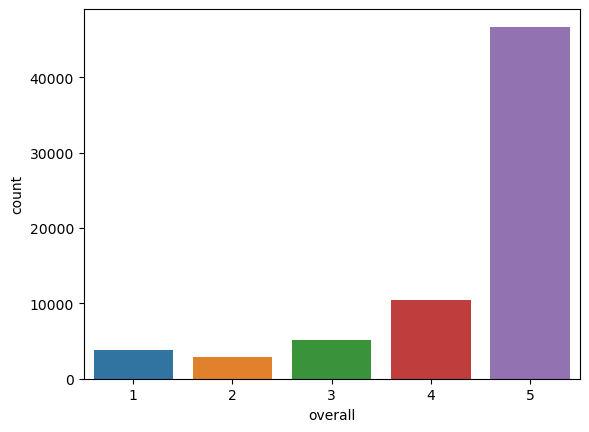

In [283]:
#Inspecting the number of stars

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.countplot(x=reviews['overall'],order = ['1','2','3','4','5'])

In [284]:
#Train test split
#dropping the SCORES (Overall column)

X = reviews.drop(columns='overall')
y = reviews['overall']

In [285]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test  = pd.DataFrame(X_test, columns=X.columns)

y_train = pd.DataFrame(y_train, columns =['overall'])
y_test  = pd.DataFrame(y_test, columns =['overall'])

<AxesSubplot:xlabel='overall', ylabel='count'>

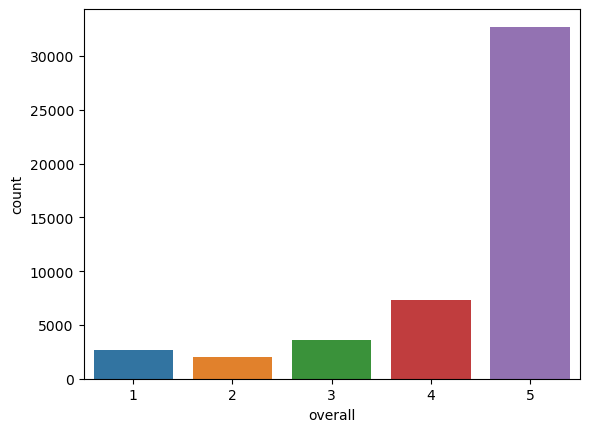

In [286]:
sns.countplot(x=y_train['overall'],order = ['1','2','3','4','5'])

<AxesSubplot:xlabel='overall', ylabel='count'>

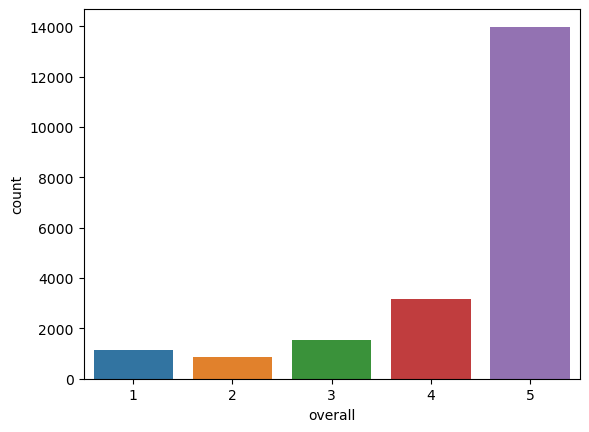

In [287]:
sns.countplot(x=y_test['overall'],order = ['1','2','3','4','5'])

In [288]:
#Class balancing

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

X_train_res = pd.DataFrame(X_train_res, columns= X_train.columns)
y_train_res = pd.DataFrame(y_train_res, columns =['overall'])

<AxesSubplot:xlabel='overall', ylabel='count'>

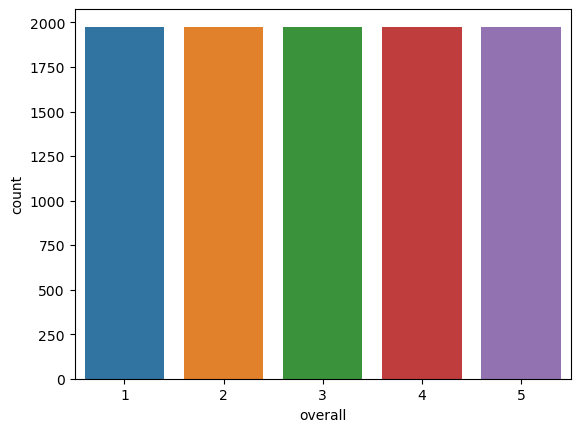

In [289]:
#checking the results

sns.countplot(x=y_train_res['overall'],order = ['1','2','3','4','5'])

In [306]:
y_train_res.value_counts()

overall
1          1976
2          1976
3          1976
4          1976
5          1976
dtype: int64

In [205]:
# This function will take a dataframe and it will return the most likely rating for a given review according to the Bayes Theorem
# rating = stars, review = X; P(R|X)

def bayes(df, rating, review ): 
    
    df2 = df.copy()
    
    p_rating = len(df2[df2['overall'] == rating]) / len(df2)
    
    m = ((df2.iloc[:,:-1] == review).apply(sum, axis=1)).tolist()
    
    t = [index for index, value in enumerate(m)]       #t is an empty list
    
    p_review = len(t) / len(df2)
    
    temp = df2[df2['overall'] == rating]
    
    m = ((df2[df2['overall'] == rating].iloc[:,:-1] == review).apply(sum, axis=1)).tolist()
    
    t = [index for index, value in enumerate(m)]
    
    p_rating_review = len(t) / len(temp)
    
    p = ( p_rating * p_rating_review ) / p_review        #p_review = 0
    
    return round(p,2)

#error: ZeroDivisionError: float division by zero

In [291]:
# Using a list comprehension to compute the probability of a given review to have a given rating

prob = [bayes(reviews, i, reviews.iloc[0,:-1].tolist()) for i in ['1','2','3','4','5']]

# Normalizing the probabilities
partition = np.sum(prob)

#partition
prob = [ ('Probability rating = ' + str(index+1),round(p/partition,2)) for index, p in enumerate(prob) ]

In [294]:
prob

[('Probability rating = 1', 0.06),
 ('Probability rating = 2', 0.04),
 ('Probability rating = 3', 0.07),
 ('Probability rating = 4', 0.15),
 ('Probability rating = 5', 0.68)]

In [295]:
reviews.iloc[0,-1]

0

In [296]:
y_train_res.shape
#y_train_res.reshape()

(9880, 1)

In [297]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.ensemble import RandomForestClassifier

nb = CategoricalNB()
rf = RandomForestClassifier()

nb.fit(X_train_res, y_train_res['overall'])
rf.fit(X_train_res, y_train_res['overall'])

RandomForestClassifier()

In [312]:
#test set

y_test.value_counts()

overall
5          13986
4           3180
3           1541
1           1127
2            852
dtype: int64

In [298]:
#making predictions

y_train_res_pred_rf = rf.predict(X_train_res)
y_test_pred_rf      = rf.predict(X_test)

In [299]:
#model evaluation - Bag of words

def model_performance_class(y_train, y_pred_train, y_test, y_pred_test):

    from sklearn.metrics import cohen_kappa_score, classification_report 


    print("Results obtained for the TRAIN SET")
    print("==================================")
    print("The Cohen's Kappa is: {:.2f}".format(cohen_kappa_score(y_train, y_pred_train)))
    print(classification_report(y_train, y_pred_train))
    print("==================================")
    print("Results obtained for the TEST SET")
    print("The Cohen's Kappa is: {:.2f}".format(cohen_kappa_score(y_test, y_pred_test)))
    print(classification_report(y_test, y_pred_test))

In [300]:
#RANDOM FOREST

model_performance_class(y_train_res, y_train_res_pred_rf, y_test, y_test_pred_rf) 

Results obtained for the TRAIN SET
The Cohen's Kappa is: 0.96
              precision    recall  f1-score   support

           1       0.99      0.97      0.98      1976
           2       0.98      0.97      0.98      1976
           3       0.98      0.97      0.97      1976
           4       0.96      0.95      0.96      1976
           5       0.93      0.98      0.96      1976

    accuracy                           0.97      9880
   macro avg       0.97      0.97      0.97      9880
weighted avg       0.97      0.97      0.97      9880

Results obtained for the TEST SET
The Cohen's Kappa is: 0.25
              precision    recall  f1-score   support

           1       0.29      0.56      0.38      1127
           2       0.13      0.27      0.17       852
           3       0.19      0.24      0.21      1541
           4       0.24      0.39      0.30      3180
           5       0.87      0.60      0.71     13986

    accuracy                           0.53     20686
   macro

In [313]:
#bag of words is not a good predictor
#Precision on Test: between 29% and 87% (Cohen's Kappa: 25%)

In [314]:
#FINISHED BAG OF WORDS

# Ngrams

In [324]:
#Defining a function to clean a review

def clean_review(x):
    x = str(x).lower().replace("\\","").replace("_"," ")
    x = re.sub(r'\W+',' ',x) # Replace everything non-alpahnumeric by ' '
    x = re.sub(r'\s+',' ',x) # Replace one or more whitespaces by  ' '
    x = re.sub(r'\d+',' ',x) # Replace one or more digits by  ' '
    x = re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)'," ", x) # Replace e-mails by ''
    # Replace urls by ''
    x = re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', ' ' , x) 
    # Replace html tags by ''
    x = BeautifulSoup(x, 'html.parser').get_text().strip()
    x = x.replace(' br ',' ')

    return x

In [325]:
data.head()

,overall,verified,asin,reviewText,summary
0,5,True,B00MFY9CDU,VERY VERY GOOD FOR ME AS I NEED A QUICK ICE CR...,I LIKE THE RESULTS AND I NEED GOOD RESULTS.
1,2,True,B00H0RTQ7Y,I love the fan but you can't get replacement f...,No filter replacements available anymore
2,5,True,B017Q2848E,Absolutely beautiful pillow covers. They made...,Five Stars
3,4,True,B0010DCIGU,Used for mimosas at a baby shower. Worked great.,Worked great.
4,3,True,B004CYELQ4,Eh it does the job. I think that if I had made...,Be a better baker


In [326]:
reviews_cleaned = data.copy()

In [327]:
reviews_cleaned = reviews_cleaned[['reviewText','overall']]

In [328]:
reviews_cleaned.head()

,reviewText,overall
0,VERY VERY GOOD FOR ME AS I NEED A QUICK ICE CR...,5
1,I love the fan but you can't get replacement f...,2
2,Absolutely beautiful pillow covers. They made...,5
3,Used for mimosas at a baby shower. Worked great.,4
4,Eh it does the job. I think that if I had made...,3


In [330]:
reviews_cleaned['reviewText'] = reviews_cleaned['reviewText'].apply(lambda x: clean_review(x)) 

In [331]:
reviews_cleaned.head()

,reviewText,overall
0,very very good for me as i need a quick ice cr...,5
1,i love the fan but you can t get replacement f...,2
2,absolutely beautiful pillow covers they made t...,5
3,used for mimosas at a baby shower worked great,4
4,eh it does the job i think that if i had made ...,3


# TF-IDF

In [332]:
from sklearn.feature_extraction.text import TfidfVectorizer

tidf = TfidfVectorizer(max_features = 20000, ngram_range = (1,2), analyzer = 'word',
                       stop_words = stop_words )

In [333]:
X = tidf.fit_transform(reviews_cleaned['reviewText'])
y = reviews_cleaned['overall']

In [334]:
tidf.get_feature_names()

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aa',
 'aa batteries',
 'aa battery',
 'aaa',
 'aaa batteries',
 'abbee',
 'ability',
 'able',
 'able buy',
 'able clean',
 'able cook',
 'able cut',
 'able find',
 'able fit',
 'able fix',
 'able get',
 'able hang',
 'able hold',
 'able keep',
 'able make',
 'able open',
 'able purchase',
 'able put',
 'able remove',
 'able see',
 'able set',
 'able sleep',
 'able store',
 'able take',
 'able use',
 'able wash',
 'abrasive',
 'absolute',
 'absolute best',
 'absolutely',
 'absolutely adorable',
 'absolutely amazing',
 'absolutely beautiful',
 'absolutely best',
 'absolutely buy',
 'absolutely gorgeous',
 'absolutely great',
 'absolutely love',
 'absolutely loved',
 'absolutely loves',
 'absolutely nothing',
 'absolutely perfect',
 'absolutely recommend',
 'absolutely stunning',
 'absolutely wonderful',
 'absorb',
 'absorb water',
 'absorbant',
 'absorbency',
 'absorbent',
 'absorbing',
 'absorbs',
 'abuse',
 'abused',
 'ac',
 'ac adapter',
 'ac unit',
 'accent',
 'accent piece',
 'acc

In [335]:
#20.000 chunks 

len(tidf.get_feature_names())

20000

In [336]:
#68952 rows

X.shape 

(68952, 20000)

In [337]:
#TRAIN TEST SPLIT

#We don't convert the X_train, X_test back to df because they are spare_matrixes and we don't know the column names anymore

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [338]:
type(X_train)

scipy.sparse._csr.csr_matrix

In [339]:
#Generating the model

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=100, n_estimators=50)

y_train = y_train.astype('int')
y_test  = y_test.astype('int')

rf.fit(X_train, y_train)

y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf  = rf.predict(X_test)

In [340]:
#RANDOM FOREST (WITH NGRAMS)

model_performance_class(y_train, y_train_pred_rf, y_test, y_test_pred_rf)

Results obtained for the TRAIN SET
The Cohen's Kappa is: 0.64
              precision    recall  f1-score   support

           1       1.00      0.67      0.80      2674
           2       1.00      0.56      0.72      1976
           3       1.00      0.54      0.70      3594
           4       1.00      0.46      0.63      7297
           5       0.82      1.00      0.90     32725

    accuracy                           0.85     48266
   macro avg       0.96      0.65      0.75     48266
weighted avg       0.88      0.85      0.83     48266

Results obtained for the TEST SET
The Cohen's Kappa is: 0.10
              precision    recall  f1-score   support

           1       0.78      0.19      0.31      1127
           2       0.58      0.01      0.02       852
           3       0.59      0.03      0.05      1541
           4       0.58      0.04      0.07      3180
           5       0.69      1.00      0.82     13986

    accuracy                           0.69     20686
   macro

In [341]:
#Ngram is not a good prediction either
##Precision on Test: between 58% and 78% (Cohen's Kappa: 10%)

In [342]:
#Finished Ngrams

# SENTIMENT

In [358]:
#First things first: installation -> conda install -c conda-forge textblob

from textblob import TextBlob

In [359]:
#create quick lambda fucntions to find the polarity and subjectivity of each review

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

In [394]:
verif_df ["polarity"] = verif_df ["reviewText"].apply(pol)
verif_df ["subjectivity"] = verif_df ["reviewText"].apply(sub)
verif_df 

/var/folders/y0/yj8c7cqs19v6_dxrxj76yrbh0000gn/T/ipykernel_4285/594371860.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verif_df ["polarity"] = verif_df ["reviewText"].apply(pol)
/var/folders/y0/yj8c7cqs19v6_dxrxj76yrbh0000gn/T/ipykernel_4285/594371860.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verif_df ["subjectivity"] = verif_df ["reviewText"].apply(sub)


,overall,verified,asin,reviewText,summary,length,polarity,subjectivity
0,5,True,B00MFY9CDU,VERY VERY GOOD FOR ME AS I NEED A QUICK ICE CR...,I LIKE THE RESULTS AND I NEED GOOD RESULTS.,56,0.508667,0.756000
1,2,True,B00H0RTQ7Y,I love the fan but you can't get replacement f...,No filter replacements available anymore,31,-0.041667,0.541667
4,3,True,B004CYELQ4,Eh it does the job. I think that if I had made...,Be a better baker,39,0.088889,0.644444
5,5,True,B007B796KU,Came well packaged. Very easy to put together....,Very nice piece.,30,0.548333,0.787500
11,3,True,B014DAVCP4,The thermometer is a little wonky. It will giv...,Sometimes the readings are all over,49,-0.063041,0.510065
...,...,...,...,...,...,...,...,...
68943,1,True,B00008ELEA,I loved the pot but failed to work after 5 mon...,Didn't last,25,0.100000,0.433333
68945,5,True,B01G7SUW0G,"Very very nice set. It's well made, not at all...",Beautiful set,57,0.640000,0.800000
68946,5,True,B002MEVMH2,I really like the table. It was shipped on tim...,Cosco Premium Square Folding TTable,29,0.450000,0.400000
68948,5,True,B00APU2XAK,This is absolutely an EXCELLENT product!!! Ver...,PERFECT!!!,74,0.451250,0.724167


In [427]:
#checking the mean of polarity and subjectivity for each score

mean_score = verif_df.groupby('overall').mean()
mean_score

,verified,length,polarity,subjectivity
overall,,,,
1,1.0,75.977989,0.014754,0.496381
2,1.0,82.848852,0.073417,0.507733
3,1.0,71.788877,0.141257,0.524697
4,1.0,73.434548,0.214577,0.555331
5,1.0,63.227945,0.302528,0.575968


<AxesSubplot:xlabel='overall', ylabel='polarity'>

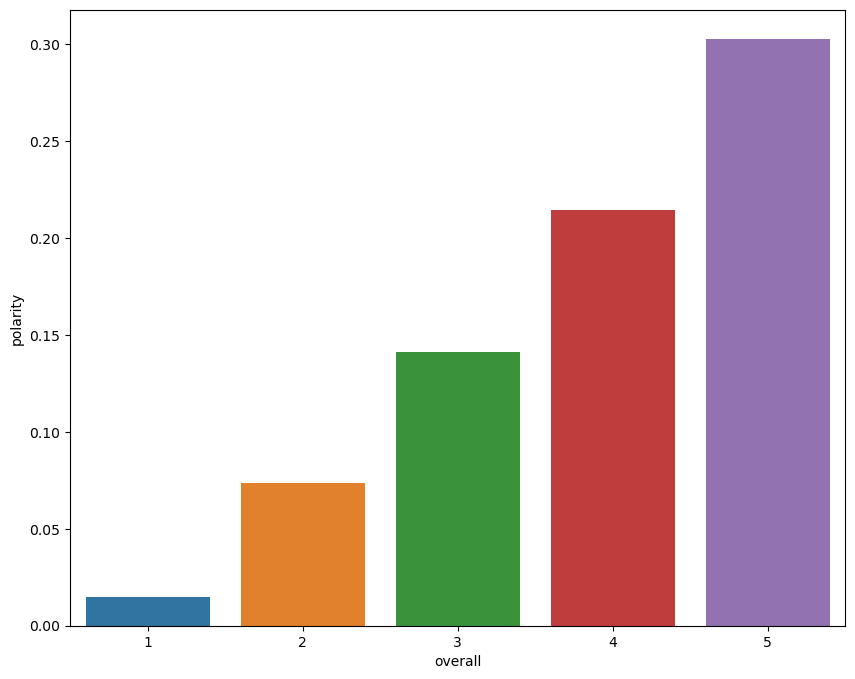

In [432]:
sns.barplot(data=mean_score, x=mean_score.index, y="polarity")


<AxesSubplot:xlabel='overall', ylabel='subjectivity'>

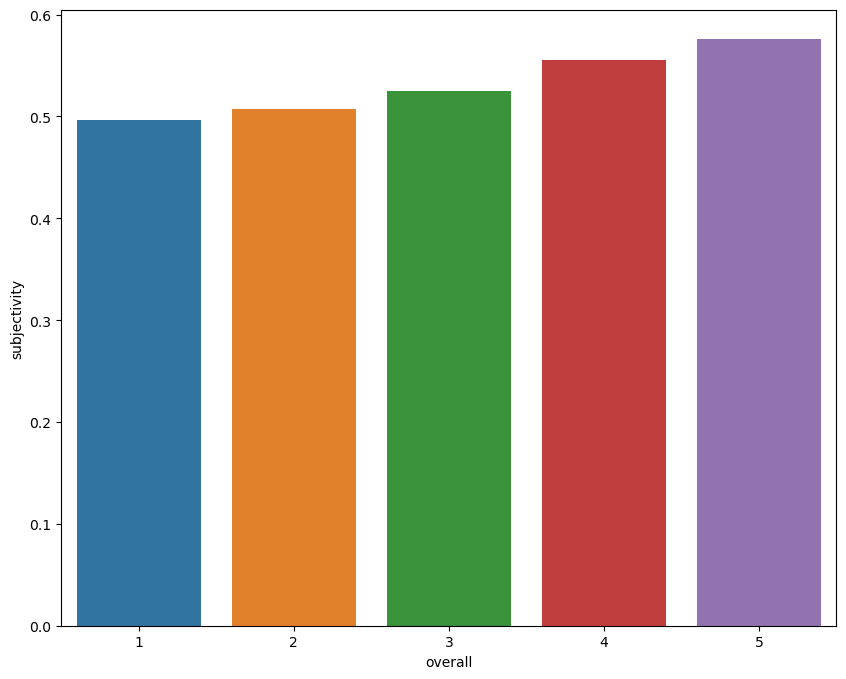

In [434]:
sns.barplot(data=mean_score, x=mean_score.index, y="subjectivity")

In [435]:
#Result: Polarity is correlated with the scores

In [420]:
#Polarity refers to the strength of an opinion. It could be positive or negative.
#Subjectivity refers to the degree to which a person is personally involved in an object. 

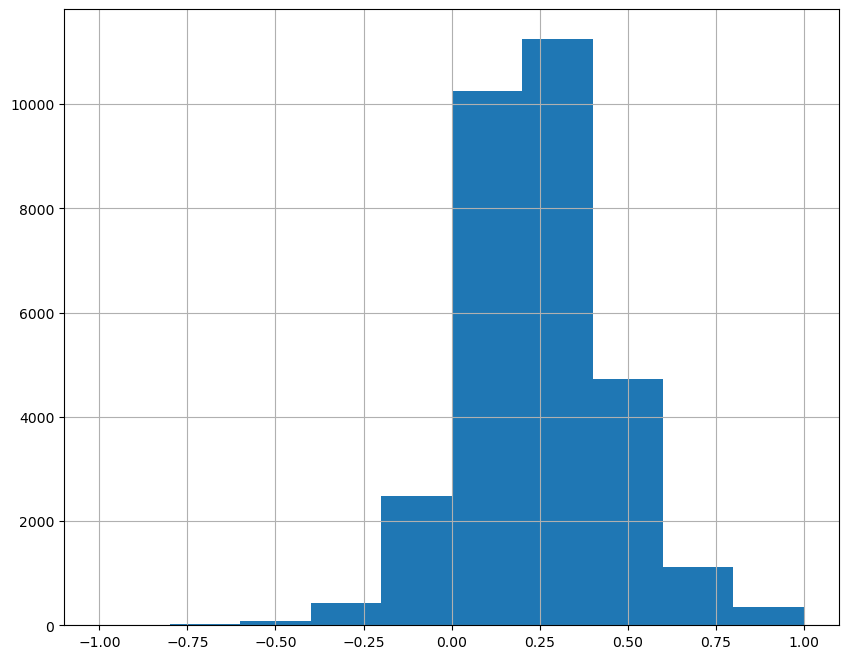

In [423]:
verif_df["polarity"].hist()

plt.show()

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='polarity', ylabel='Density'>

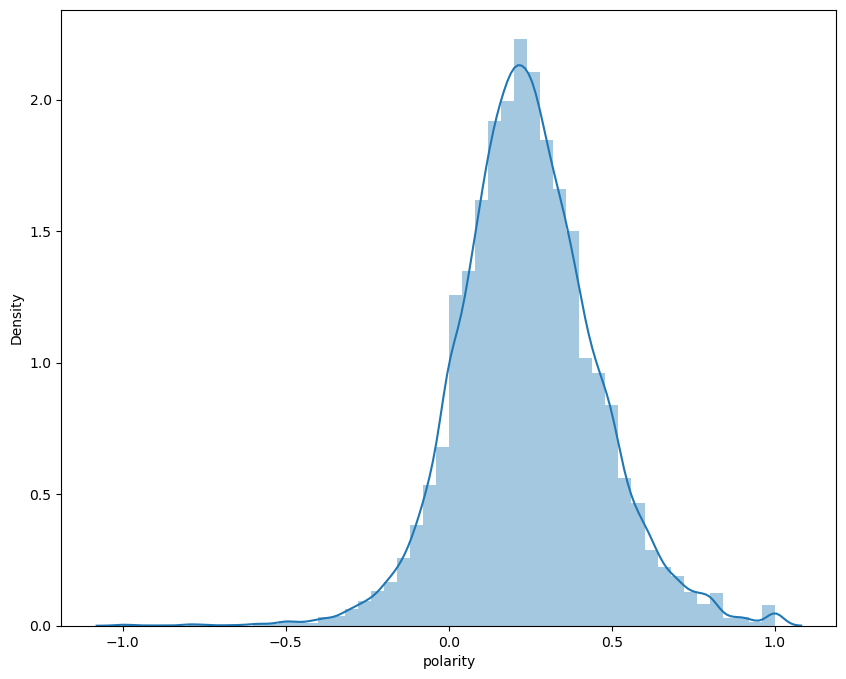

In [424]:
import seaborn as sns
sns.distplot(verif_df["polarity"])

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='subjectivity', ylabel='Density'>

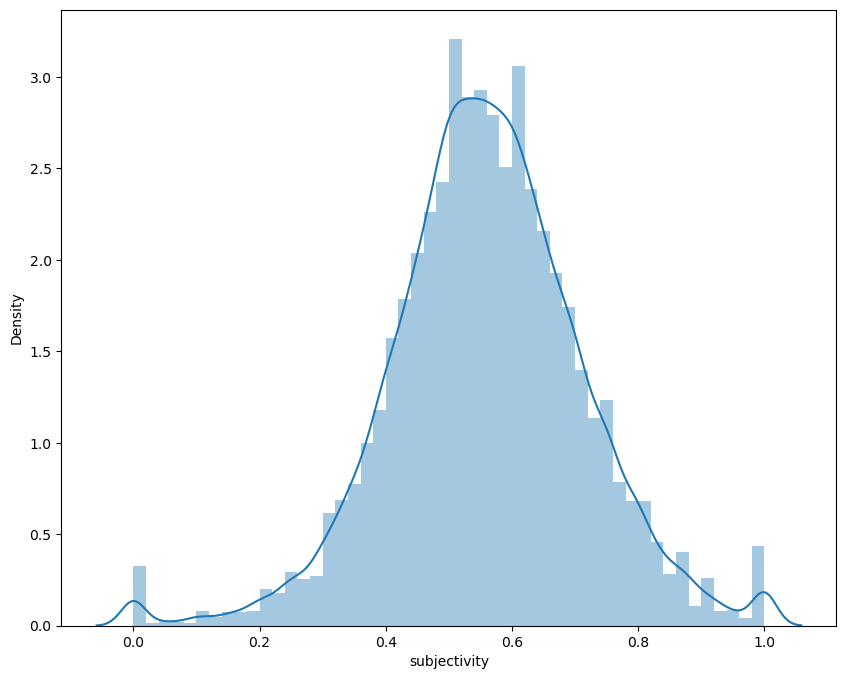

In [425]:
import seaborn as sns
sns.distplot(verif_df["subjectivity"])

In [442]:
verif_df['polarity2'] = pd.cut(verif_df["polarity"], [-1, -0.33, 0.33, 1], labels = ["negative", "neutral", "positive"])
verif_df

/var/folders/y0/yj8c7cqs19v6_dxrxj76yrbh0000gn/T/ipykernel_4285/511820315.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verif_df['polarity2'] = pd.cut(verif_df["polarity"], [-1, -0.33, 0.33, 1], labels = ["negative", "neutral", "positive"])


,overall,verified,asin,reviewText,summary,length,polarity,subjectivity,polarity2
0,5,True,B00MFY9CDU,VERY VERY GOOD FOR ME AS I NEED A QUICK ICE CR...,I LIKE THE RESULTS AND I NEED GOOD RESULTS.,56,0.508667,0.756000,positive
1,2,True,B00H0RTQ7Y,I love the fan but you can't get replacement f...,No filter replacements available anymore,31,-0.041667,0.541667,neutral
4,3,True,B004CYELQ4,Eh it does the job. I think that if I had made...,Be a better baker,39,0.088889,0.644444,neutral
5,5,True,B007B796KU,Came well packaged. Very easy to put together....,Very nice piece.,30,0.548333,0.787500,positive
11,3,True,B014DAVCP4,The thermometer is a little wonky. It will giv...,Sometimes the readings are all over,49,-0.063041,0.510065,neutral
...,...,...,...,...,...,...,...,...,...
68943,1,True,B00008ELEA,I loved the pot but failed to work after 5 mon...,Didn't last,25,0.100000,0.433333,neutral
68945,5,True,B01G7SUW0G,"Very very nice set. It's well made, not at all...",Beautiful set,57,0.640000,0.800000,positive
68946,5,True,B002MEVMH2,I really like the table. It was shipped on tim...,Cosco Premium Square Folding TTable,29,0.450000,0.400000,positive
68948,5,True,B00APU2XAK,This is absolutely an EXCELLENT product!!! Ver...,PERFECT!!!,74,0.451250,0.724167,positive


In [446]:
verif_df = verif_df.drop(axis=1, columns= "subjectivity")
verif_df

,overall,verified,asin,reviewText,summary,length,polarity,polarity2
0,5,True,B00MFY9CDU,VERY VERY GOOD FOR ME AS I NEED A QUICK ICE CR...,I LIKE THE RESULTS AND I NEED GOOD RESULTS.,56,0.508667,positive
1,2,True,B00H0RTQ7Y,I love the fan but you can't get replacement f...,No filter replacements available anymore,31,-0.041667,neutral
4,3,True,B004CYELQ4,Eh it does the job. I think that if I had made...,Be a better baker,39,0.088889,neutral
5,5,True,B007B796KU,Came well packaged. Very easy to put together....,Very nice piece.,30,0.548333,positive
11,3,True,B014DAVCP4,The thermometer is a little wonky. It will giv...,Sometimes the readings are all over,49,-0.063041,neutral
...,...,...,...,...,...,...,...,...
68943,1,True,B00008ELEA,I loved the pot but failed to work after 5 mon...,Didn't last,25,0.100000,neutral
68945,5,True,B01G7SUW0G,"Very very nice set. It's well made, not at all...",Beautiful set,57,0.640000,positive
68946,5,True,B002MEVMH2,I really like the table. It was shipped on tim...,Cosco Premium Square Folding TTable,29,0.450000,positive
68948,5,True,B00APU2XAK,This is absolutely an EXCELLENT product!!! Ver...,PERFECT!!!,74,0.451250,positive
